<a href="https://colab.research.google.com/github/MadmanMarble/MadmanMarble/blob/main/Image_processing_planet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('gdalutils')
install.packages('sf')
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("DBI")
install.packages("RSQLite")
install.packages("RPostgreSQL")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘gdalutils’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘googletoken’ is not available for this version of R

A version of this packag

# New Section

In [2]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)
library(zip)

Linking to GEOS 3.11.1, GDAL 3.6.4, PROJ 9.1.1; sf_use_s2() is TRUE

Loading required package: sp


Attaching package: ‘zip’


The following objects are masked from ‘package:utils’:

    unzip, zip




In [3]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=2ade34ad1d82cb8058f542c6b6c63290&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYazE2ZnZFalNQZUpJOVJtT081ZUJLUFNvWHZ0WTV3R1RVZTEwdWx1WkI2VmU5aERTOG5vN2RCODViMHJ3WEtyQSIsInN0YXRlIjoiMmFkZTM0YWQxZDgyY2I4MDU4ZjU0MmM2YjZjNjMyOTAifQ==


In [536]:
dir.create('/content/waipio2018/')

In [537]:
# kahuku
# CCAP:  https://drive.google.com/file/d//view?usp=drive_link
drive_download(file = as_id('1wvtHlIlzIT-rzXKS4gohsTgd63T-Z0EI'), path =  '/content/waipio2018/waipio2018_ccap.tif', overwrite = TRUE)

File downloaded:

• waipio.tif <id: 1wvtHlIlzIT-rzXKS4gohsTgd63T-Z0EI>

Saved locally as:

• /content/waipio2018/waipio2018_ccap.tif



In [538]:
# Planet Labs:
drive_download(file = as_id('1LeTKzEKgxeOk08iU12Z5KG9xdWYSO6-h'), path =  '/content/waipio2018/01.tif', overwrite = TRUE)
drive_download(file = as_id('1LqW_TJ1PXfAxsq_hZH_hMCUTaINBanf0'), path =  '/content/waipio2018/02.tif', overwrite = TRUE)
drive_download(file = as_id('1NkWoeO37wrqLj7J5l17T86g2CkFHZnvr'), path =  '/content/waipio2018/03.tif', overwrite = TRUE)
drive_download(file = as_id('1OPAkh7WBnirBjVRhfGisQrSkZzBwMj11'), path =  '/content/waipio2018/04.tif', overwrite = TRUE)
drive_download(file = as_id('1NM3GEHKPCL_xyo8yg6a7kIjXh7WDM29o'), path =  '/content/waipio2018/05.tif', overwrite = TRUE)
# drive_download(file = as_id(''), path =  '/content/waihee2018/06.tif', overwrite = TRUE)
# drive_download(file = as_id(''), path =  '/content/lokoaka_kionakapahu2018/07.tif', overwrite = TRUE)
# drive_download(file = as_id(''), path =  '/content/kanaha2018/08.tif', overwrite = TRUE)
# drive_download(file = as_id(''), path =  '/content/kaluaapuhi2018/09.tif', overwrite = TRUE)
# drive_download(file = as_id(''), path =  '/content/kahuku2019/10.tif', overwrite = TRUE)
# drive_download(file = as_id(''), path =  '/content/kahuku2019/11.tif', overwrite = TRUE)

# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy

File downloaded:

• 2018-01-09_strip_1056048_composite.tif
  <id: 1LeTKzEKgxeOk08iU12Z5KG9xdWYSO6-h>

Saved locally as:

• /content/waipio2018/01.tif

File downloaded:

• 2018-02-06_strip_1148337_composite.tif
  <id: 1LqW_TJ1PXfAxsq_hZH_hMCUTaINBanf0>

Saved locally as:

• /content/waipio2018/02.tif

File downloaded:

• 2018-09-19_strip_1710125_composite.tif
  <id: 1NkWoeO37wrqLj7J5l17T86g2CkFHZnvr>

Saved locally as:

• /content/waipio2018/03.tif

File downloaded:

• 2018-10-01_strip_1737715_composite.tif
  <id: 1OPAkh7WBnirBjVRhfGisQrSkZzBwMj11>

Saved locally as:

• /content/waipio2018/04.tif

File downloaded:

• 2018-12-11_strip_1923490_composite.tif
  <id: 1NM3GEHKPCL_xyo8yg6a7kIjXh7WDM29o>

Saved locally as:

• /content/waipio2018/05.tif



In [539]:
planet_raster <-stack(
  '/content/waipio2018/01.tif',
'/content/waipio2018/02.tif',
'/content/waipio2018/03.tif',
'/content/waipio2018/04.tif',
'/content/waipio2018/05.tif')

In [540]:
ccap_raster <- stack('/content/waipio2018/waipio2018_ccap.tif')

In [541]:
planet_raster_extended <- extend(planet_raster, projectExtent(ccap_raster, planet_raster), value=NA)

In [542]:
ccap_raster
planet_raster

class      : RasterStack 
dimensions : 1942, 1247, 2421674, 1  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 226466.3, 229459.1, 2223094, 2227755  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
names      : Layer_1 


class      : RasterStack 
dimensions : 1555, 1000, 1555000, 20  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 226464, 229464, 2223090, 2227755  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
names      : X01_1.1, X01_1.2, X01_1.3, X01_1.4, X02_1.1, X02_1.2, X02_1.3, X02_1.4, X03_1.1, X03_1.2, X03_1.3, X03_1.4, X04_1.1, X04_1.2, X04_1.3, ... 


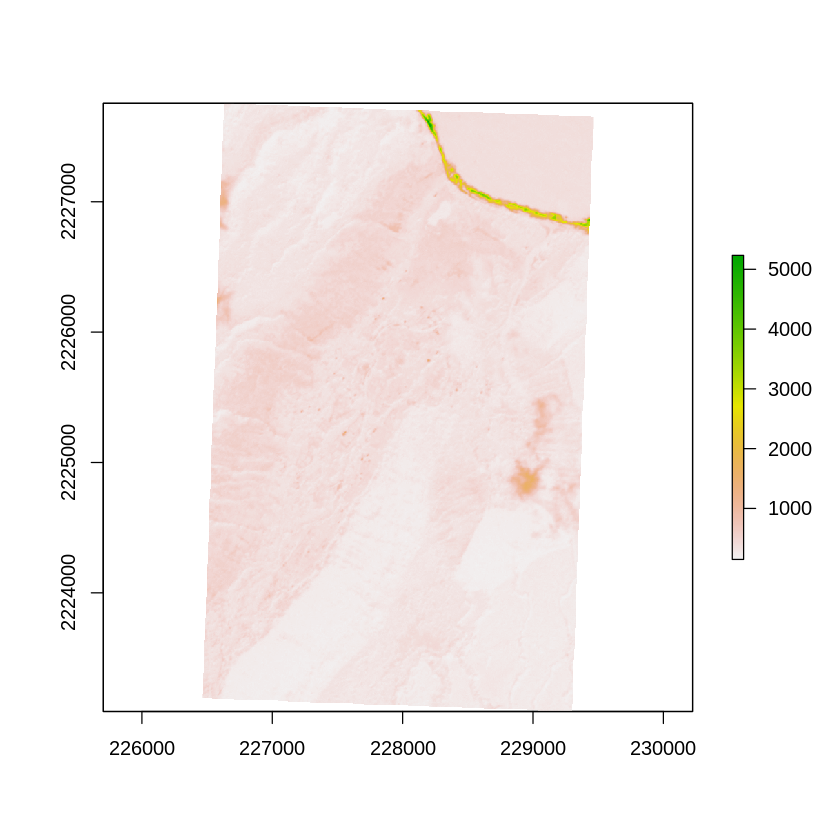

In [543]:
planet_raster [[1]]%>% plot

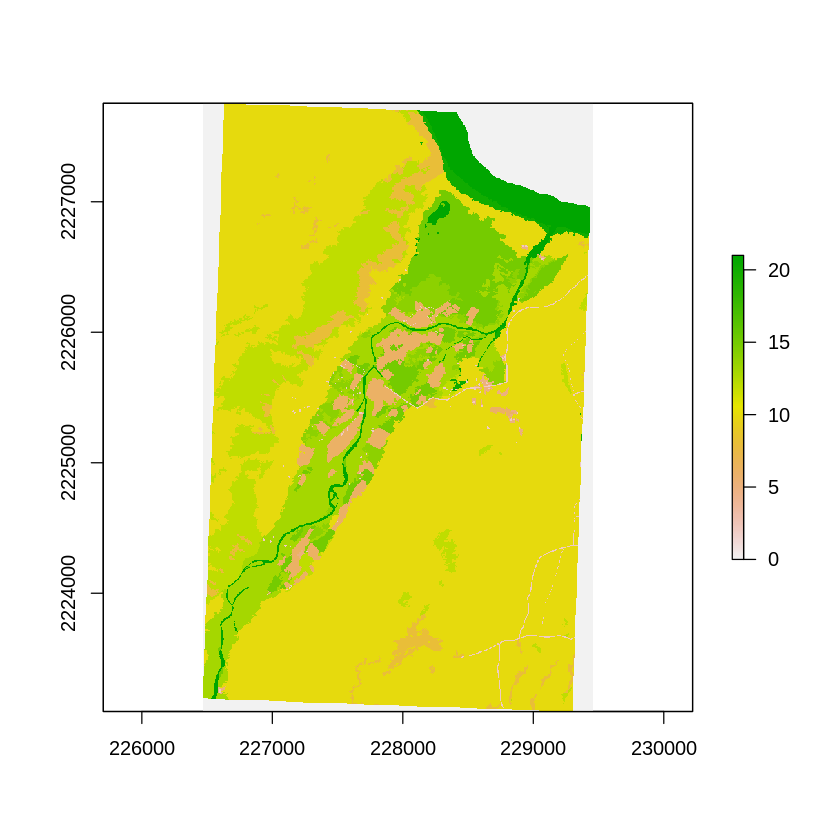

In [544]:
ccap_raster %>% plot

In [545]:
ncol(ccap_raster)

nrow(ccap_raster)


y_end <- c(seq(1,ccap_raster %>% nrow,512),nrow(ccap_raster))[-1]
x_end <- c(seq(1,ccap_raster %>% ncol,512),ncol(ccap_raster))[-1]

extract_grid <- expand.grid(x_end,y_end) %>% data.table

names(extract_grid) <- c('x_end','y_end')

extract_grid$x_org <- extract_grid$x_end - 512
extract_grid$y_org <- extract_grid$y_end - 512

extract_grid$id <- 1:nrow(extract_grid)

[1] 1247

[1] 1942

In [546]:
# dir.create('/TrainingData/Niihau')
# Specify the path for the new folder/directory
new_folder_path <- "/content/waipio2018/Images"
new_folder_path2 <- "/content/waipio2018/Labels"
# Use dir.create to create the new folder
dir.create(new_folder_path, showWarnings = FALSE)

# Check if the folder was created successfully
if (file.exists(new_folder_path)) {
  cat("Folder created:", new_folder_path, "\n")
} else {
  cat("Failed to create folder:", new_folder_path, "\n")
}


# Use dir.create to create the new folder
dir.create(new_folder_path2, showWarnings = FALSE)
# Check if the folder was created successfully
if (file.exists(new_folder_path2)) {
  cat("Folder created:", new_folder_path2, "\n")
} else {
  cat("Failed to create folder:", new_folder_path2, "\n")
}

Folder created: /content/waipio2018/Images 
Folder created: /content/waipio2018/Labels 


In [547]:
result_dt <-
1:nrow(extract_grid) %>% lapply(function(x){

  nrow <- 0
  ncol <- 0
  i <- 0
  while(nrow !=512 | ncol != 512){
    i <- i + 1
    # Calculate the geographic coordinates for the cropping extent
    xmin <- xFromCol(ccap_raster, extract_grid[x,]$x_org) + rnorm(1)*.01*2.4
    xmax <- xFromCol(ccap_raster, extract_grid[x,]$x_end) + rnorm(1)*.01*2.4
    ymin <- yFromRow(ccap_raster, extract_grid[x,]$y_end) + rnorm(1)*.01*2.4 # Note row_max as raster origin is top-left
    ymax <- yFromRow(ccap_raster, extract_grid[x,]$y_org) + rnorm(1)*.01*2.4 # Note row_min as raster origin is top-left

    e <- extent(xmin, xmax, ymin, ymax)

    ccap_cropped_raster <- crop(ccap_raster, e)

    nrow <- nrow(ccap_cropped_raster)
    ncol <- ncol(ccap_cropped_raster)


    # print(dim(ccap_cropped_raster))
    if(i>1000){return('failed to converge')}
    }

  ls_cropped_raster <- crop(planet_raster_extended, projectExtent(ccap_cropped_raster,planet_raster))

  ls_resampled_raster <- projectRaster(ls_cropped_raster,ccap_cropped_raster)
  print(ls_resampled_raster)
  pixel_table <- (table(values(ccap_cropped_raster))/ncell(ccap_cropped_raster)) %>% data.table

  names(pixel_table) <- c('label','percent')

  out_dt <- data.table(extract_grid[x,],xmin = xmin,xmax =xmax,ymin= ymin,ymax, pixel_table)

  if(ls_resampled_raster %>% nrow ==512 & ls_resampled_raster %>% ncol ==512 & ccap_cropped_raster%>% nrow ==512 & ccap_cropped_raster%>% ncol ==512){
    ls_resampled_raster %>%
    writeRaster(., paste("/content/waipio2018/Images/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)

    ccap_cropped_raster %>%
    writeRaster(., paste("/content/waipio2018/Labels/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)
  }else(print('uh oh'))

  return(out_dt)
})
result_dt[ result_dt %>% lapply(function(x){is.data.table(x)}) %>% unlist] %>% rbindlist %>%
fwrite("/content/waipio2018/waipio2018.csv")


class      : RasterBrick 
dimensions : 512, 512, 262144, 20  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 226466.3, 227695.1, 2226526, 2227755  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
source     : memory
names      :     X01_1.1,     X01_1.2,     X01_1.3,     X01_1.4,     X02_1.1,     X02_1.2,     X02_1.3,     X02_1.4,     X03_1.1,     X03_1.2,     X03_1.3,     X03_1.4,     X04_1.1,     X04_1.2,     X04_1.3, ... 
min values : 130.2328438, 170.1332004, 149.6112132, 733.4438421, 193.7863866, 318.2107000, 328.6647325, 819.3080868, 126.8424042, 180.0979697, 145.4222049, 949.4150171,   0.8670894,  61.4839843,  81.3348760, ... 
max values :   1329.7259,   1499.0896,   1544.3652,   5161.6455,    626.8990,    921.0272,    991.0679,   5749.3161,    537.7463,    820.5356,    783.1333,   5351.0954,    309.8708,    666.6124,    678.6644, ... 

class      : RasterBrick 
dimensions : 512, 512, 262144, 20  (nrow, ncol, ncell, 

In [548]:
zip(zipfile = "/content/waipio2018.zip",
    files = c("/content/waipio2018/Images",
              "/content/waipio2018/Labels",
              "/content/waipio2018/waipio2018.csv"))

Warning message in fix_absolute_paths(data$key):
“Dropping leading `/` from paths, all paths in a zip file must be relative paths.”


In [549]:
# save to processed_data https://drive.google.com/drive/folders/1d_Ix2hIbwtT2XAqtzncui2jPq13vKOoe?usp=drive_link
drive_upload(media = "/content/waipio2018.zip", path = as_id("1d_Ix2hIbwtT2XAqtzncui2jPq13vKOoe"))

Local file:

• /content/waipio2018.zip

Uploaded into Drive file:

• waipio2018.zip <id: 1_MohPjAZL5XM_WXW4XnywN14U-GkIaPu>

With MIME type:

• application/zip



## 2019 Cell

In [550]:
dir.create('/content/waipio2019/')

In [551]:
# Planet Labs:
drive_download(file = as_id('1KeAvepC2PiBS4rzjg_dGLaptI9jJV157'), path =  '/content/waipio2019/01.tif', overwrite = TRUE)
drive_download(file = as_id('1LVWBXskD70KEffEPl77Oc0F3LBb2Lg4R'), path =  '/content/waipio2019/02.tif', overwrite = TRUE)
drive_download(file = as_id('1K0jHCdIS0Ca8gIaHS6vZVrhX93BBdt82'), path =  '/content/waipio2019/03.tif', overwrite = TRUE)
drive_download(file = as_id('1KaiyahZjf8AwnrIbAPYV9zgqIVoHmaD7'), path =  '/content/waipio2019/04.tif', overwrite = TRUE)
drive_download(file = as_id('1L00LjmU-FeJydu5xWqRNu_uHqEksKgA5'), path =  '/content/waipio2019/05.tif', overwrite = TRUE)
# drive_download(file = as_id(''), path =  '/content/waimanu2019/06.tif', overwrite = TRUE)
# drive_download(file = as_id(''), path =  '/content/waimanu2019/07.tif', overwrite = TRUE)
# drive_download(file = as_id(''), path =  '/content/pololu2019/08.tif', overwrite = TRUE)
# drive_download(file = as_id(''), path =  '/content/pololu2019/09.tif', overwrite = TRUE)
# drive_download(file = as_id(''), path =  '/content/pololu2019/10.tif', overwrite = TRUE)
# drive_download(file = as_id(''), path =  '/content/kahuku2019/11.tif', overwrite = TRUE)

# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy

File downloaded:

• 2019-02-18_strip_2130331_composite.tif
  <id: 1KeAvepC2PiBS4rzjg_dGLaptI9jJV157>

Saved locally as:

• /content/waipio2019/01.tif

File downloaded:

• 2019-03-31_strip_2251337_composite.tif
  <id: 1LVWBXskD70KEffEPl77Oc0F3LBb2Lg4R>

Saved locally as:

• /content/waipio2019/02.tif

File downloaded:

• 2019-06-23_strip_2469737_composite.tif
  <id: 1K0jHCdIS0Ca8gIaHS6vZVrhX93BBdt82>

Saved locally as:

• /content/waipio2019/03.tif

File downloaded:

• 2019-10-20_strip_2767749_composite.tif
  <id: 1KaiyahZjf8AwnrIbAPYV9zgqIVoHmaD7>

Saved locally as:

• /content/waipio2019/04.tif

File downloaded:

• 2019-12-09_strip_2919172_composite.tif
  <id: 1L00LjmU-FeJydu5xWqRNu_uHqEksKgA5>

Saved locally as:

• /content/waipio2019/05.tif



In [552]:
planet_raster <-stack(
  '/content/waipio2019/01.tif',
'/content/waipio2019/02.tif',
'/content/waipio2019/03.tif',
'/content/waipio2019/04.tif',
'/content/waipio2019/05.tif')

In [553]:
planet_raster_extended <- extend(planet_raster, projectExtent(ccap_raster, planet_raster), value=NA)

In [554]:
ccap_raster
planet_raster

class      : RasterStack 
dimensions : 1942, 1247, 2421674, 1  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 226466.3, 229459.1, 2223094, 2227755  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
names      : Layer_1 


class      : RasterStack 
dimensions : 1555, 1000, 1555000, 20  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 226464, 229464, 2223090, 2227755  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
names      : X01_1.1, X01_1.2, X01_1.3, X01_1.4, X02_1.1, X02_1.2, X02_1.3, X02_1.4, X03_1.1, X03_1.2, X03_1.3, X03_1.4, X04_1.1, X04_1.2, X04_1.3, ... 


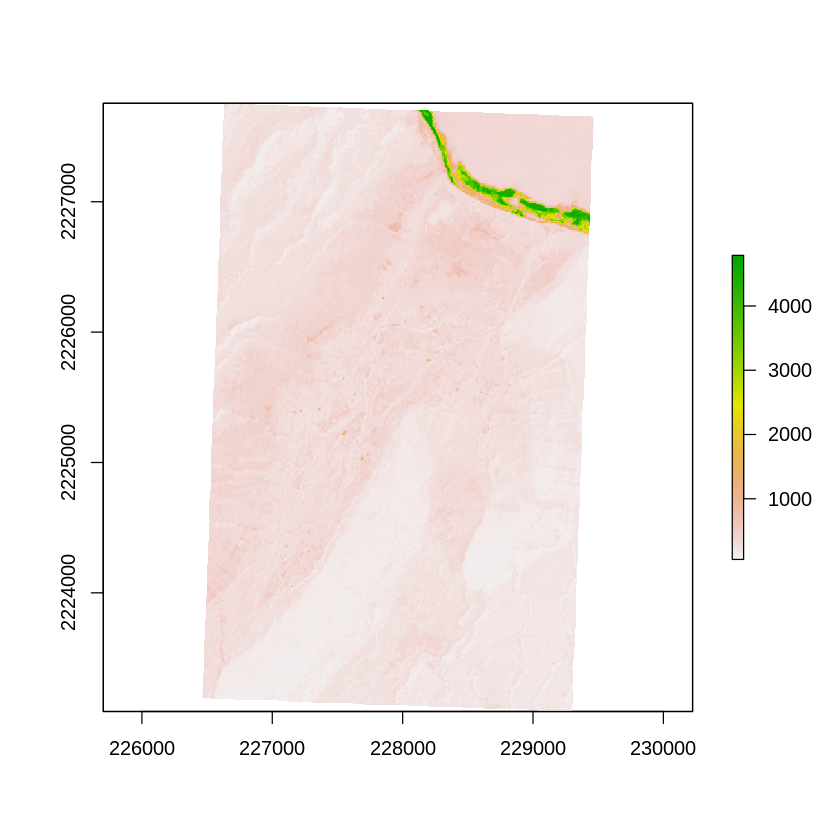

In [555]:
planet_raster [[1]]%>% plot

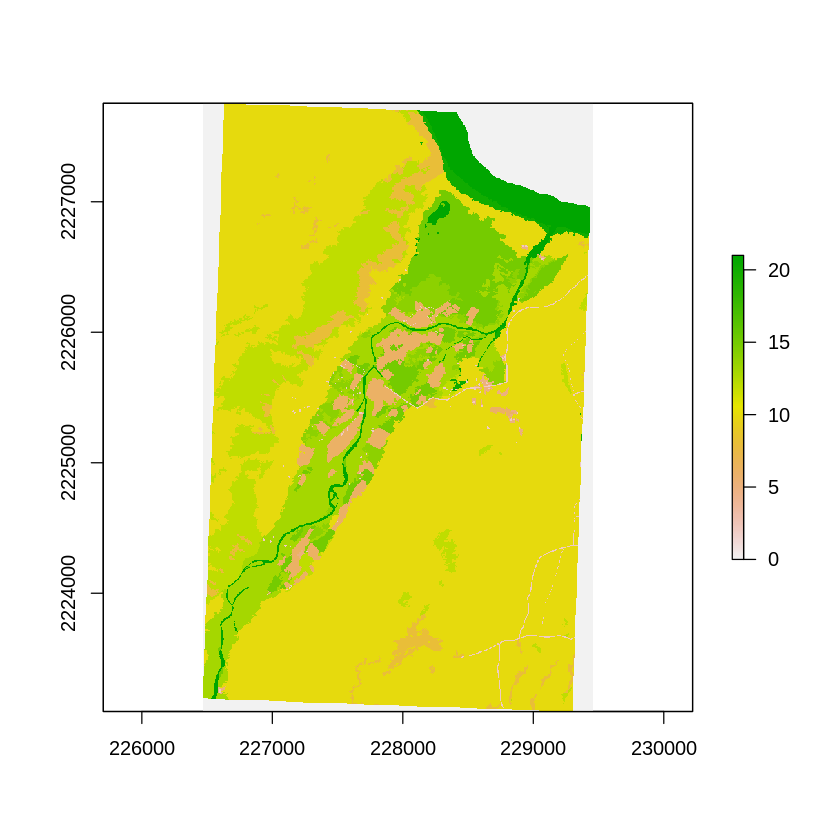

In [556]:
ccap_raster %>% plot

In [557]:
ncol(ccap_raster)

nrow(ccap_raster)


y_end <- c(seq(1,ccap_raster %>% nrow,512),nrow(ccap_raster))[-1]
x_end <- c(seq(1,ccap_raster %>% ncol,512),ncol(ccap_raster))[-1]

extract_grid <- expand.grid(x_end,y_end) %>% data.table

names(extract_grid) <- c('x_end','y_end')

extract_grid$x_org <- extract_grid$x_end - 512
extract_grid$y_org <- extract_grid$y_end - 512

extract_grid$id <- 1:nrow(extract_grid)

[1] 1247

[1] 1942

In [558]:
# dir.create('/TrainingData/Niihau')
# Specify the path for the new folder/directory
new_folder_path <- "/content/waipio2019/Images"
new_folder_path2 <- "/content/waipio2019/Labels"
# Use dir.create to create the new folder
dir.create(new_folder_path, showWarnings = FALSE)

# Check if the folder was created successfully
if (file.exists(new_folder_path)) {
  cat("Folder created:", new_folder_path, "\n")
} else {
  cat("Failed to create folder:", new_folder_path, "\n")
}


# Use dir.create to create the new folder
dir.create(new_folder_path2, showWarnings = FALSE)
# Check if the folder was created successfully
if (file.exists(new_folder_path2)) {
  cat("Folder created:", new_folder_path2, "\n")
} else {
  cat("Failed to create folder:", new_folder_path2, "\n")
}

Folder created: /content/waipio2019/Images 
Folder created: /content/waipio2019/Labels 


In [559]:
result_dt <-
1:nrow(extract_grid) %>% lapply(function(x){

  nrow <- 0
  ncol <- 0
  i <- 0
  while(nrow !=512 | ncol != 512){
    i <- i + 1
    # Calculate the geographic coordinates for the cropping extent
    xmin <- xFromCol(ccap_raster, extract_grid[x,]$x_org) + rnorm(1)*.01*2.4
    xmax <- xFromCol(ccap_raster, extract_grid[x,]$x_end) + rnorm(1)*.01*2.4
    ymin <- yFromRow(ccap_raster, extract_grid[x,]$y_end) + rnorm(1)*.01*2.4 # Note row_max as raster origin is top-left
    ymax <- yFromRow(ccap_raster, extract_grid[x,]$y_org) + rnorm(1)*.01*2.4 # Note row_min as raster origin is top-left

    e <- extent(xmin, xmax, ymin, ymax)

    ccap_cropped_raster <- crop(ccap_raster, e)

    nrow <- nrow(ccap_cropped_raster)
    ncol <- ncol(ccap_cropped_raster)


    # print(dim(ccap_cropped_raster))
    if(i>1000){return('failed to converge')}
    }

  ls_cropped_raster <- crop(planet_raster_extended, projectExtent(ccap_cropped_raster,planet_raster))

  ls_resampled_raster <- projectRaster(ls_cropped_raster,ccap_cropped_raster)
  print(ls_resampled_raster)
  pixel_table <- (table(values(ccap_cropped_raster))/ncell(ccap_cropped_raster)) %>% data.table

  names(pixel_table) <- c('label','percent')

  out_dt <- data.table(extract_grid[x,],xmin = xmin,xmax =xmax,ymin= ymin,ymax, pixel_table)

  if(ls_resampled_raster %>% nrow ==512 & ls_resampled_raster %>% ncol ==512 & ccap_cropped_raster%>% nrow ==512 & ccap_cropped_raster%>% ncol ==512){
    ls_resampled_raster %>%
    writeRaster(., paste("/content/waipio2019/Images/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)

    ccap_cropped_raster %>%
    writeRaster(., paste("/content/waipio2019/Labels/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)
  }else(print('uh oh'))

  return(out_dt)
})
result_dt[ result_dt %>% lapply(function(x){is.data.table(x)}) %>% unlist] %>% rbindlist %>%
fwrite("/content/waipio2019/waipio2019.csv")


class      : RasterBrick 
dimensions : 512, 512, 262144, 20  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 226468.7, 227697.5, 2226523, 2227752  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
source     : memory
names      :    X01_1.1,    X01_1.2,    X01_1.3,    X01_1.4,    X02_1.1,    X02_1.2,    X02_1.3,    X02_1.4,    X03_1.1,    X03_1.2,    X03_1.3,    X03_1.4,    X04_1.1,    X04_1.2,    X04_1.3, ... 
min values :   71.88165,  214.52964,  234.07948,  652.18050,  178.94541,  223.20350,  263.37952,  934.12251,  264.94872,  417.85509,  343.78714, 2085.26921,  184.82763,  182.28734,  192.39263, ... 
max values :   467.5878,   776.2078,   811.9459,  5300.5960,   538.7612,   774.8088,   790.3764,  4156.8576,   600.3732,  1140.2821,   798.5698,  5703.3272,   504.6827,   604.2739,   624.9210, ... 

class      : RasterBrick 
dimensions : 512, 512, 262144, 20  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent

In [560]:
zip(zipfile = "/content/waipio2019.zip",
    files = c("/content/waipio2019/Images",
              "/content/waipio2019/Labels",
              "/content/waipio2019/waipio2019.csv"))

Warning message in fix_absolute_paths(data$key):
“Dropping leading `/` from paths, all paths in a zip file must be relative paths.”


In [561]:
# save to processed_data https://drive.google.com/drive/folders/1d_Ix2hIbwtT2XAqtzncui2jPq13vKOoe?usp=drive_link
drive_upload(media = "/content/waipio2019.zip", path = as_id("1d_Ix2hIbwtT2XAqtzncui2jPq13vKOoe"))

Local file:

• /content/waipio2019.zip

Uploaded into Drive file:

• waipio2019.zip <id: 1KZzhAJq1tvpvdzuyFIFyp4HKClOu1P47>

With MIME type:

• application/zip



## 2020 Cell

In [562]:
dir.create('/content/waipio2020/')

In [563]:
# Planet Labs:
drive_download(file = as_id('1YP-gt1KSxq1gYtoSEzUQmw9GhFcD4-iL'), path =  '/content/waipio2020/01.tif', overwrite = TRUE)
drive_download(file = as_id('1XrxefyV3xjXY781Ma23vgkYy6bHRvqO_'), path =  '/content/waipio2020/02.tif', overwrite = TRUE)
drive_download(file = as_id('1XzWtTgzjr9Jdw7dRYW2Fd8cP82n2ZTNo'), path =  '/content/waipio2020/03.tif', overwrite = TRUE)
drive_download(file = as_id('1ZVJ1rMyIgdULASlHf20tXRX956CQ2SgU'), path =  '/content/waipio2020/04.tif', overwrite = TRUE)
drive_download(file = as_id('1XuJLEFB_YQ2ZexcTlcbGBd6LDpu2WhxG'), path =  '/content/waipio2020/05.tif', overwrite = TRUE)
# drive_download(file = as_id(''), path =  '/content/wailua_opaekaa2020/06.tif', overwrite = TRUE)
# drive_download(file = as_id(''), path =  '/content/wailua_opaekaa2020/07.tif', overwrite = TRUE)
# # drive_download(file = as_id(''), path =  '/content/kanaha2020/08.tif', overwrite = TRUE)
# drive_download(file = as_id(''), path =  '/content/kanaha2020/09.tif', overwrite = TRUE)
# drive_download(file = as_id(''), path =  '/content/kanaha2020/10.tif', overwrite = TRUE)
# drive_download(file = as_id(''), path =  '/content/kanaha2020/11.tif', overwrite = TRUE)

# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy

File downloaded:

• 2020-03-02_strip_3193454_composite.tif
  <id: 1YP-gt1KSxq1gYtoSEzUQmw9GhFcD4-iL>

Saved locally as:

• /content/waipio2020/01.tif

File downloaded:

• 2020-05-27_strip_3435035_composite.tif
  <id: 1XrxefyV3xjXY781Ma23vgkYy6bHRvqO_>

Saved locally as:

• /content/waipio2020/02.tif

File downloaded:

• 2020-08-28_strip_3684568_composite.tif
  <id: 1XzWtTgzjr9Jdw7dRYW2Fd8cP82n2ZTNo>

Saved locally as:

• /content/waipio2020/03.tif

File downloaded:

• 2020-10-18_strip_3821849_composite.tif
  <id: 1ZVJ1rMyIgdULASlHf20tXRX956CQ2SgU>

Saved locally as:

• /content/waipio2020/04.tif

File downloaded:

• 2020-11-09_strip_3885059_composite.tif
  <id: 1XuJLEFB_YQ2ZexcTlcbGBd6LDpu2WhxG>

Saved locally as:

• /content/waipio2020/05.tif



In [564]:
# planet <- stack ('/content/kaluaapuhi2020/09.tif')
# planet[[1]] %>% plot

In [565]:
planet_raster <-stack(
  '/content/waipio2020/01.tif',
'/content/waipio2020/02.tif',
'/content/waipio2020/03.tif',
'/content/waipio2020/04.tif',
'/content/waipio2020/05.tif')

In [566]:
planet_raster_extended <- extend(planet_raster, projectExtent(ccap_raster, planet_raster), value=NA)

In [567]:
ccap_raster
planet_raster

class      : RasterStack 
dimensions : 1942, 1247, 2421674, 1  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 226466.3, 229459.1, 2223094, 2227755  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
names      : Layer_1 


class      : RasterStack 
dimensions : 1555, 1000, 1555000, 20  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 226464, 229464, 2223090, 2227755  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
names      : X01_1.1, X01_1.2, X01_1.3, X01_1.4, X02_1.1, X02_1.2, X02_1.3, X02_1.4, X03_1.1, X03_1.2, X03_1.3, X03_1.4, X04_1.1, X04_1.2, X04_1.3, ... 


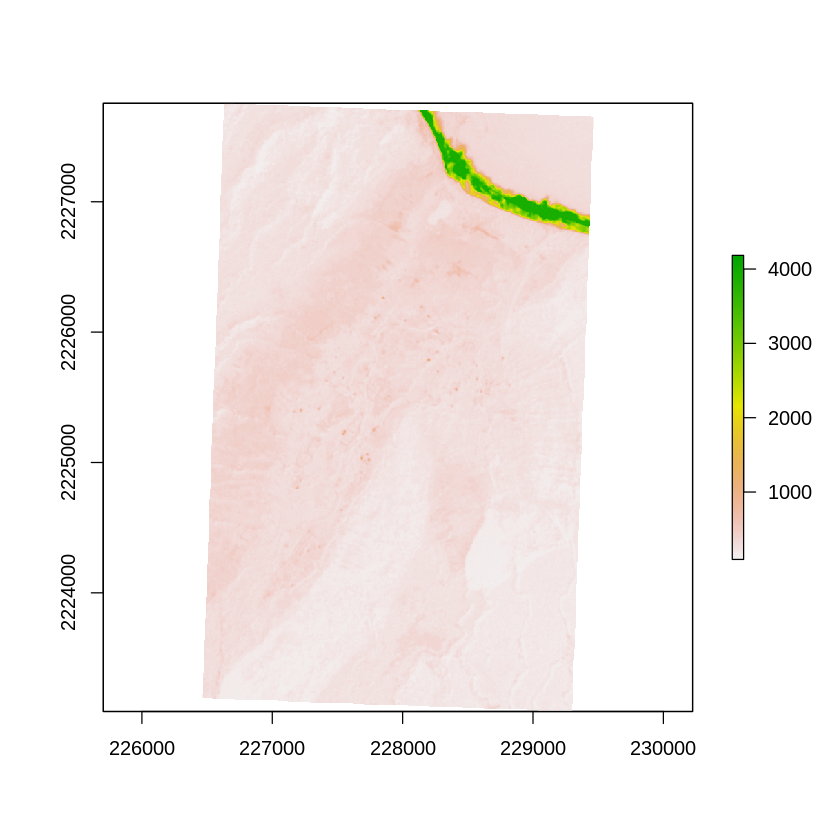

In [568]:
planet_raster [[1]]%>% plot

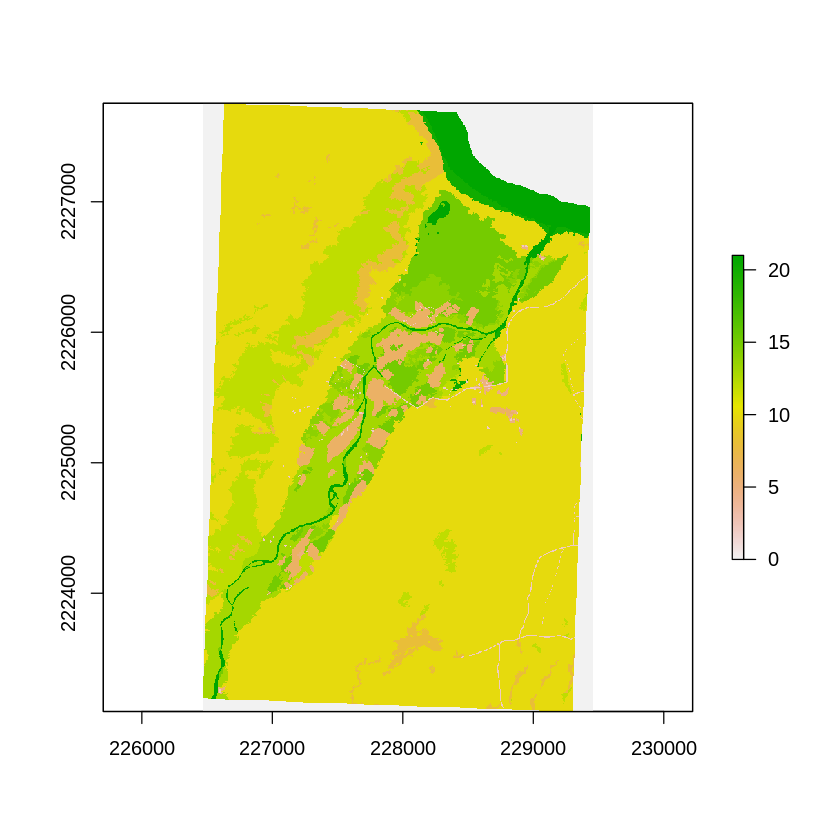

In [569]:
ccap_raster %>% plot

In [570]:
ncol(ccap_raster)

nrow(ccap_raster)


y_end <- c(seq(1,ccap_raster %>% nrow,512),nrow(ccap_raster))[-1]
x_end <- c(seq(1,ccap_raster %>% ncol,512),ncol(ccap_raster))[-1]

extract_grid <- expand.grid(x_end,y_end) %>% data.table

names(extract_grid) <- c('x_end','y_end')

extract_grid$x_org <- extract_grid$x_end - 512
extract_grid$y_org <- extract_grid$y_end - 512

extract_grid$id <- 1:nrow(extract_grid)

[1] 1247

[1] 1942

In [571]:
# dir.create('/TrainingData/Niihau')
# Specify the path for the new folder/directory
new_folder_path <- "/content/waipio2020/Images"
new_folder_path2 <- "/content/waipio2020/Labels"
# Use dir.create to create the new folder
dir.create(new_folder_path, showWarnings = FALSE)

# Check if the folder was created successfully
if (file.exists(new_folder_path)) {
  cat("Folder created:", new_folder_path, "\n")
} else {
  cat("Failed to create folder:", new_folder_path, "\n")
}


# Use dir.create to create the new folder
dir.create(new_folder_path2, showWarnings = FALSE)
# Check if the folder was created successfully
if (file.exists(new_folder_path2)) {
  cat("Folder created:", new_folder_path2, "\n")
} else {
  cat("Failed to create folder:", new_folder_path2, "\n")
}

Folder created: /content/waipio2020/Images 
Folder created: /content/waipio2020/Labels 


In [572]:
result_dt <-
1:nrow(extract_grid) %>% lapply(function(x){

  nrow <- 0
  ncol <- 0
  i <- 0
  while(nrow !=512 | ncol != 512){
    i <- i + 1
    # Calculate the geographic coordinates for the cropping extent
    xmin <- xFromCol(ccap_raster, extract_grid[x,]$x_org) + rnorm(1)*.01*2.4
    xmax <- xFromCol(ccap_raster, extract_grid[x,]$x_end) + rnorm(1)*.01*2.4
    ymin <- yFromRow(ccap_raster, extract_grid[x,]$y_end) + rnorm(1)*.01*2.4 # Note row_max as raster origin is top-left
    ymax <- yFromRow(ccap_raster, extract_grid[x,]$y_org) + rnorm(1)*.01*2.4 # Note row_min as raster origin is top-left

    e <- extent(xmin, xmax, ymin, ymax)

    ccap_cropped_raster <- crop(ccap_raster, e)

    nrow <- nrow(ccap_cropped_raster)
    ncol <- ncol(ccap_cropped_raster)


    # print(dim(ccap_cropped_raster))
    if(i>1000){return('failed to converge')}
    }

  ls_cropped_raster <- crop(planet_raster_extended, projectExtent(ccap_cropped_raster,planet_raster))

  ls_resampled_raster <- projectRaster(ls_cropped_raster,ccap_cropped_raster)
  print(ls_resampled_raster)
  pixel_table <- (table(values(ccap_cropped_raster))/ncell(ccap_cropped_raster)) %>% data.table

  names(pixel_table) <- c('label','percent')

  out_dt <- data.table(extract_grid[x,],xmin = xmin,xmax =xmax,ymin= ymin,ymax, pixel_table)

  if(ls_resampled_raster %>% nrow ==512 & ls_resampled_raster %>% ncol ==512 & ccap_cropped_raster%>% nrow ==512 & ccap_cropped_raster%>% ncol ==512){
    ls_resampled_raster %>%
    writeRaster(., paste("/content/waipio2020/Images/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)

    ccap_cropped_raster %>%
    writeRaster(., paste("/content/waipio2020/Labels/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)
  }else(print('uh oh'))

  return(out_dt)
})
result_dt[ result_dt %>% lapply(function(x){is.data.table(x)}) %>% unlist] %>% rbindlist %>%
fwrite("/content/waipio2020/waipio2020.csv")


class      : RasterBrick 
dimensions : 512, 512, 262144, 20  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 226468.7, 227697.5, 2226523, 2227752  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
source     : memory
names      :    X01_1.1,    X01_1.2,    X01_1.3,    X01_1.4,    X02_1.1,    X02_1.2,    X02_1.3,    X02_1.4,    X03_1.1,    X03_1.2,    X03_1.3,    X03_1.4,    X04_1.1,    X04_1.2,    X04_1.3, ... 
min values :   99.49572,  251.60024,  265.66209,  939.36508,   13.57888,   63.68992,  107.95000,  755.38324,   20.40740,   42.86590,   16.74969, 1131.72185,  307.59362,  398.02950,  374.65680, ... 
max values :   464.5076,   743.9239,   834.8509,  4339.0885,   788.9547,   987.6921,  1125.3016,  5768.2093,   282.2456,   837.7236,   490.7917,  5776.6099,   728.3855,   969.6466,  1041.6843, ... 

class      : RasterBrick 
dimensions : 512, 512, 262144, 20  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent

In [573]:
zip(zipfile = "/content/waipio2020.zip",
    files = c("/content/waipio2020/Images",
              "/content/waipio2020/Labels",
              "/content/waipio2020/waipio2020.csv"))

Warning message in fix_absolute_paths(data$key):
“Dropping leading `/` from paths, all paths in a zip file must be relative paths.”


In [574]:
# save to processed_data https://drive.google.com/drive/folders/1d_Ix2hIbwtT2XAqtzncui2jPq13vKOoe?usp=drive_link
drive_upload(media = "/content/waipio2020.zip", path = as_id("1d_Ix2hIbwtT2XAqtzncui2jPq13vKOoe"))

Local file:

• /content/waipio2020.zip

Uploaded into Drive file:

• waipio2020.zip <id: 1gqR6eGCCvmi91Tl2Whh9ISwhcuoOl5UO>

With MIME type:

• application/zip

